In [2]:
import sys
import sklearn
import numpy as np
import os

from mlxtend.data import loadlocal_mnist
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import LinearSVR, SVR
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

# Where to save the figures
PROJECT_ROOT_DIR = "."
MNIST_PATH = PROJECT_ROOT_DIR + "/datasets/mnist/"




In [3]:
def get_setosa_or_versicolor(iris):
    X = iris["data"]  # petal length, petal width
    y = iris["target"]

    setosa_or_versicolor = (y == 0) | (y == 1)
    print(setosa_or_versicolor)
    return X[setosa_or_versicolor], y[setosa_or_versicolor]

def get_virginica(iris):
    X = iris["data"][:, (2, 3)]  # petal length, petal width
    y = (iris["target"] == 2).astype(np.float64)  # Iris virginica
    return X, y

def performance(y_test, y_test_pred, average='binary'):
    precision = precision_score(y_test, y_test_pred, average=average)
    recall = recall_score(y_test, y_test_pred, average=average)
    f1 = f1_score(y_test, y_test_pred, average=average)
    return precision, recall, f1  

def load_mnist(path=MNIST_PATH):
    X_train, y_train = loadlocal_mnist(
            images_path= MNIST_PATH+'train-images.idx3-ubyte', 
            labels_path= MNIST_PATH+'train-labels.idx1-ubyte')
    X_test, y_test = loadlocal_mnist(
            images_path= MNIST_PATH+'t10k-images.idx3-ubyte', 
            labels_path= MNIST_PATH+'t10k-labels.idx1-ubyte')
    return X_train, X_test, y_train, y_test

def transform(dataset):
    pipeline = Pipeline([
        ('std_scaler',    StandardScaler())
    ])

    return pipeline.fit_transform(dataset)



In [4]:
#main program
if __name__ == '__main__':
    # Large margin classification
    iris = datasets.load_iris()
    
    # make training data for binary classifiers
    X, y = get_setosa_or_versicolor(iris)
    print(len(X))
    print(X)
    print(y)
    
    


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
100
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  

In [5]:
    print()
#     svm_clf = SVC(kernel="linear", C=float("inf"))
    svm_clf = SVC(kernel="linear", C=1)
    svm_clf.fit(X, y)
    y_pred = svm_clf.predict(X)
    precision, recall, f1 = performance(y, y_pred, average="micro")
    print(precision, recall, f1)
##
##
    #Large margin vs margin violations
    #X, y = get_virginica(iris)
    X_train, X_test, y_train, y_test = load_mnist(MNIST_PATH)
    print(X_train.shape)
    print(X_test.shape)
    




1.0 1.0 1.0
(60000, 784)
(10000, 784)


In [6]:
    print()
#     # small size
    X_train, y_train = X_train[:10000], y_train[:10000]

    svm_clf1 = Pipeline([
       ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])
    print("training .....")
    print(svm_clf1)
    svm_clf1.fit(X_train, y_train)
    y_pred = svm_clf1.predict(X_test)
    precision, recall, f1 = performance(y_test, y_pred, average="micro")
    print(precision, recall, f1)



training .....
Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])
0.8561 0.8561 0.8561


In [7]:
    print()

##
    svm_clf2_1 = Pipeline([
       ("scaler", StandardScaler()),
       ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])
    print("training .....")
    svm_clf2_1.fit(X_train, y_train)
    y_pred = svm_clf2_1.predict(X_test)
    precision, recall, f1 = performance(y_test, y_pred, average="micro")
    print(precision, recall, f1)


training .....
0.8646 0.8646 0.8646


In [8]:
    print()

##
    svm_clf2 = Pipeline([
       ("scaler", MinMaxScaler()),
       ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])
    print("training .....")
    svm_clf2.fit(X_train, y_train)
    y_pred = svm_clf2.predict(X_test)
    precision, recall, f1 = performance(y_test, y_pred, average="micro")
    print(precision, recall, f1)




training .....
0.9002 0.9002 0.9001999999999999


In [9]:
    print()
##    # different regularization settings:
    svm_clf3 = Pipeline([
       ("scaler", MinMaxScaler()),
       ("linear_svc", LinearSVC(C=0.1, loss="hinge", random_state=42)),
    ])
    print("training .....")
    svm_clf3.fit(X_train, y_train)
    y_pred = svm_clf3.predict(X_test)
    precision, recall, f1 = performance(y_test, y_pred, average="micro")
    print(precision, recall, f1)




training .....
0.9091 0.9091 0.9091


In [10]:
#     print()
# ##    # different regularization settings:
#     svm_clf3_1 = Pipeline([
#        ("scaler", MinMaxScaler()),
#        ("linear_svc", LinearSVC(C=0.1, kernel="poly" ,loss="hinge", random_state=42)),
#     ])
#     print("training .....")
#     svm_clf3_1.fit(X_train, y_train)
#     y_pred = svm_clf3.predict(X_test)
#     precision, recall, f1 = performance(y_test, y_pred, average="micro")
#     print(precision, recall, f1)



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

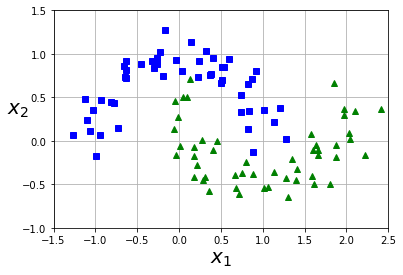

In [13]:
    print()
    # Non-linear classification
    X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
#     print(X)
#     print(y)
    ############################
#     fig, ax = plt.sublots(figsize=(14, 8))
#     print()
#     plt.plot(X[0], X[1], y)
#     plt.show()
#     print()
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    plt.show()
    ############################


In [14]:
    polynomial_svm_clf = Pipeline([
       ("poly_features", PolynomialFeatures(degree=3)),
       ("scaler", StandardScaler()),
       ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])
    print("training .....")
    polynomial_svm_clf.fit(X, y)
    y_pred = polynomial_svm_clf.predict(X)
    precision, recall, f1 = performance(y, y_pred, average="micro")
    print(precision, recall, f1)

training .....
0.97 0.97 0.97


In [15]:
    print()
    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
    poly_kernel_svm_clf.fit(X, y)
    y_pred = poly_kernel_svm_clf.predict(X)
    precision, recall, f1 = performance(y, y_pred, average="micro")
    print(precision, recall, f1)


0.98 0.98 0.98


In [16]:
    poly100_kernel_svm_clf = Pipeline([
        ("scaler",  MinMaxScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
    poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

In [17]:
    print()

    y_pred = poly100_kernel_svm_clf.predict(X)
    precision, recall, f1 = performance(y, y_pred, average="micro")
    print(precision, recall, f1)


1.0 1.0 1.0


In [18]:
    
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
    rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [19]:
    print()

    y_pred = rbf_kernel_svm_clf.predict(X)
    precision, recall, f1 = performance(y, y_pred, average="micro")
    print(precision, recall, f1)


0.97 0.97 0.97


In [20]:
    # Regression
    np.random.seed(42)
    m = 50
    X = 2 * np.random.rand(m, 1)
    y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

    

In [21]:
    svm_reg = LinearSVR(epsilon=1.5, random_state=42)
    svm_reg.fit(X, y)
    y_pred = svm_reg.predict(X)
#     precision, recall, f1 = performance(y, y_pred, average="micro")
#     print(precision, recall, f1)

In [22]:
    svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
    svm_poly_reg1.fit(X, y)
    
    

SVR(C=100, degree=2, kernel='poly')

In [23]:
    svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
    svm_poly_reg2.fit(X, y)
    
    

SVR(C=0.01, degree=2, kernel='poly')